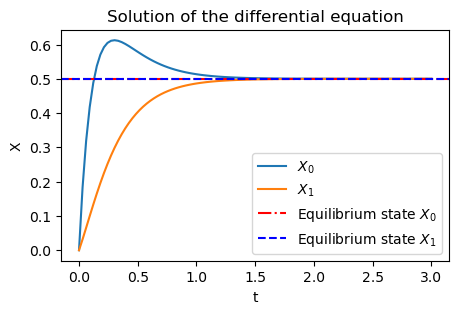

In [21]:
import numpy as np
from scipy.linalg import eig, inv
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def solve_linear_system(A, B, X0, t):
    """
    Solves the differential equation dX/dt = AX + B.
    
    Parameters:
    A (numpy.ndarray): Coefficient matrix.
    B (numpy.ndarray): Constant vector.
    X0 (numpy.ndarray): Initial condition vector.
    t (numpy.ndarray): Array of time points at which to solve.
    
    Returns:
    numpy.ndarray: Array of solution vectors at each time point.
    """
    # Equilibrium state
    X_eq = -inv(A) @ B
    
    # Eigenvalues and eigenvectors
    # eigenvalues, eigenvectors = eig(A)
    
    # Solve for the constants a1, a2, b1, b2
    def system(X, t):
        return A @ X + B
    
    sol = odeint(system, X0, t)
    
    return sol, X_eq

# Example usage:
A = np.array([[-9, -5], [1, -3]])
B = np.array([7, 1])
X0 = np.array([0, 0])
t = np.linspace(0, 3, 100)

solution, X_eq = solve_linear_system(A, B, X0, t)

# Printing the solution
plt.figure(figsize=(5,3))
plt.plot(t, solution[:, 0], label=r'$X_0$')
plt.plot(t, solution[:, 1], label=r'$X_1$')
plt.axhline(X_eq[0], color='r', ls='-.', label=r'Equilibrium state $X_0$')
plt.axhline(X_eq[1], color='b', ls='--', label=r'Equilibrium state $X_1$')
plt.legend()
plt.xlabel('t')
plt.ylabel('X')

plt.title('Solution of the differential equation');


#### Analytical Solution for $\frac{d\vec{X}}{dt} = A\vec{X} + \vec{B}$

Let's derive the analytical solution step-by-step for the differential equation $\frac{d\vec{X}}{dt} = A\vec{X} + \vec{B}$, assuming $\lambda_1 \neq \lambda_2$.

##### Steps to Solve Analytically

1. Find the Equilibrium State
The equilibrium state $\vec{X}_{eq}$ is given by:
$$
\vec{X}_{eq} = -A^{-1} \vec{B}
$$

2. Determine the Eigenvalues and Eigenvectors
The eigenvalues $\lambda_1$ and $\lambda_2$ are solutions to the characteristic equation:
$$
\det(A - \lambda I) = 0
$$
where $I$ is the identity matrix.

Let's denote the eigenvectors corresponding to $\lambda_1$ and $\lambda_2$ as $\vec{v}_1$ and $\vec{v}_2$, respectively.

3. General Solution
The general solution for the system $\frac{d\vec{X}}{dt} = A\vec{X}$ can be written as:
$$
\vec{X}(t) = c_1 \vec{v}_1 e^{\lambda_1 t} + c_2 \vec{v}_2 e^{\lambda_2 t}
$$
where $c_1$ and $c_2$ are constants determined by initial conditions.

4. Incorporate the Equilibrium State
To incorporate $\vec{B}$, we use the transformation $\vec{X} = \vec{X}_{hom} + \vec{X}_{eq}$, where $\vec{X}_{hom}$ is the homogeneous solution. Thus:
$$
\vec{X}(t) = \vec{X}_{hom}(t) + \vec{X}_{eq}
$$
$$
\vec{X}(t) = c_1 \vec{v}_1 e^{\lambda_1 t} + c_2 \vec{v}_2 e^{\lambda_2 t} + \vec{X}_{eq}
$$

This gives us the analytical solution in the form:
$$
\vec{X}(t) = \begin{pmatrix} 
a_1 e^{\lambda_1 t} + a_2 e^{\lambda_2 t} \\ 
b_1 e^{\lambda_1 t} + b_2 e^{\lambda_2 t} 
\end{pmatrix} + \vec{X}_{eq}
$$



5. General Solution for Repeated Eigenvalues

The general solution when $\lambda_1 = \lambda_2 = \lambda$ is:
$$
\vec{X}(t) = (c_1 + c_2 t) e^{\lambda t} \vec{v} + \vec{X}_{eq}
$$

-8.0 -4.0 [-8. -4.]


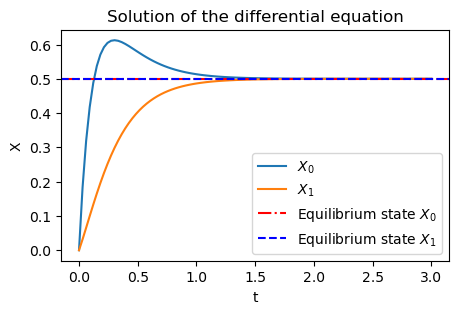

In [43]:
import numpy as np
from scipy.linalg import inv, eig

def analytical_solution(A, B, X0, t):
    # Equilibrium state
    X_eq = -inv(A) @ B
    
    # Eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eig(A)
    lambda1, lambda2 = np.real(eigenvalues)
    v1, v2 = eigenvectors.T
    
    # Ensure lambda1 != lambda2 for the provided solution
    if np.isclose(lambda1, lambda2):
        raise ValueError("The eigenvalues must be distinct.")
    
    # Calculate the coefficients c1 and c2 using initial conditions
    def initial_condition_coefficients(X0):
        V = np.column_stack((v1, v2))
        c = np.linalg.solve(V, X0 - X_eq)
        return c
    
    c1, c2 = initial_condition_coefficients(X0)
    
    # Construct the solution
    X_t = np.array([c1 * v1 * np.exp(lambda1 * t_) + c2 * v2 * np.exp(lambda2 * t_) + X_eq for t_ in t])
    
    return X_t, X_eq

# Example usage:
A = np.array([[-9, -5], [1, -3]])
B = np.array([7, 1])
X0 = np.array([0, 0])
t = np.linspace(0, 3, 100)

solution, X_eq = analytical_solution(A, B, X0, t)

# Printing the solution
plt.figure(figsize=(5,3))
plt.plot(t, solution[:, 0], label=r'$X_0$')
plt.plot(t, solution[:, 1], label=r'$X_1$')
plt.axhline(X_eq[0], color='r', ls='-.', label=r'Equilibrium state $X_0$')
plt.axhline(X_eq[1], color='b', ls='--', label=r'Equilibrium state $X_1$')
plt.legend()
plt.xlabel('t')
plt.ylabel('X')

plt.title('Solution of the differential equation');

In [8]:
import numpy as np
import sympy as sp

def analytical_solution_sympy(A, B, X0, verbose=True):
    t = sp.symbols('t')
    A = sp.Matrix(A)
    B = sp.Matrix(B)
    X0 = sp.Matrix(X0)
    
    # Equilibrium state
    X_eq = -A.inv() * B
    
    # Eigenvalues and eigenvectors
    eigenvals = A.eigenvals()
    eigenvects = A.eigenvects()
    
    print("Eigenvalues:", list(eigenvals.keys()))
    
    if len(eigenvals) == 2 or list(eigenvals.values()).count(1) == 2:
        if verbose:
            print("The matrix A have two distinct eigenvalues.")

        lambda1, lambda2 = eigenvals.keys()
        v1 = eigenvects[0][2][0].normalized()
        v2 = eigenvects[1][2][0].normalized()
    
        # Construct the general solution
        c1, c2 = sp.symbols('c1 c2')
        X_hom = c1 * v1 * sp.exp(lambda1 * t) + c2 * v2 * sp.exp(lambda2 * t)
        X_t = X_hom + X_eq
        
        # Calculate the coefficients c1 and c2 using initial conditions
        C = sp.Matrix([c1, c2])
        V = sp.Matrix.hstack(v1, v2)
        C_vals = sp.linsolve((V, X0 - X_eq))
    
        c1_val, c2_val = list(C_vals)[0]
        X_t = X_t.subs({c1: c1_val, c2: c2_val})
        
        # LaTeX representation
        latex_solution = sp.latex(sp.simplify(X_t))
    
    if len(eigenvals) == 1:
        if verbose:
            print("The matrix A must have one repeated eigenvalue.")
        
        
    return X_t, latex_solution

    
    
def latex_analytical_solution_repeated_eigenvalues(A, B, X0):
    t = sp.symbols('t')
    A = sp.Matrix(A)
    B = sp.Matrix(B)
    X0 = sp.Matrix(X0)
    
    # Equilibrium state
    X_eq = -A.inv() * B
    
    # Eigenvalues and eigenvectors
    eigenvals = A.eigenvals()
    eigenvects = A.eigenvects()
    
    if len(eigenvals) != 1 or list(eigenvals.values())[0] != 2:
        raise ValueError("The matrix A must have a single repeated eigenvalue.")
    
    lambda_ = list(eigenvals.keys())[0]
    v = eigenvects[0][2][0].normalized()
    
    # Find the generalized eigenvector u
    I = sp.eye(A.shape[0])
    u = sp.symbols(f'u:{A.shape[0]}')
    u = sp.Matrix(u)
    gen_eigenvector_eq = (A - lambda_ * I) * u - v
    sol = sp.linsolve(gen_eigenvector_eq, *u)
    if len(sol) == 0:
        raise ValueError("No generalized eigenvector found.")
    
    u = list(sol)[0]
    u = sp.Matrix(u)  # Ensure u is a matrix
    
    # Construct the general solution
    c1, c2 = sp.symbols('c1 c2')
    X_hom = (c1 + c2 * t) * sp.exp(lambda_ * t) * v
    X_t = X_hom + X_eq
    
    # Calculate the coefficients c1 and c2 using initial conditions
    C = sp.Matrix([c1, c2])
    V = sp.Matrix.hstack(v, u)
    C_vals = sp.linsolve((V, X0 - X_eq))
    
    if len(C_vals) == 0:
        raise ValueError("Could not determine the initial condition coefficients.")
    
    c1_val, c2_val = list(C_vals)[0]
    X_t = X_t.subs({c1: c1_val, c2: c2_val})
    
    # LaTeX representation
    latex_solution = sp.latex(sp.simplify(X_t))
    
    return X_t, latex_solution

# Example usage:
A = np.array([[-9, -5], [1, -3]])
B = np.array([7, 1])
X0 = np.array([0, 0])

X, latex_solution = analytical_solution_sympy(A, B, X0)
print(f"Analytical solution in LaTeX: {X}")
print(f"LaTeX representation: {latex_solution}")

X

Eigenvalues: [-4, -8]
The matrix A have two distinct eigenvalues.
Analytical solution in LaTeX: Matrix([[1/2 - 5*exp(-4*t)/4 + 3*exp(-8*t)/4], [1/2 + exp(-4*t)/4 - 3*exp(-8*t)/4]])
LaTeX representation: \left[\begin{matrix}\frac{1}{2} - \frac{5 e^{- 4 t}}{4} + \frac{3 e^{- 8 t}}{4}\\\frac{\left(2 e^{8 t} + e^{4 t} - 3\right) e^{- 8 t}}{4}\end{matrix}\right]


Matrix([
[1/2 - 5*exp(-4*t)/4 + 3*exp(-8*t)/4],
[  1/2 + exp(-4*t)/4 - 3*exp(-8*t)/4]])

Analytical solution 

$$
Matrix([[1/2 - 5*exp(-4*t)/4 + 3*exp(-8*t)/4], [1/2 + exp(-4*t)/4 - 3*exp(-8*t)/4]])
$$

In [14]:
import numpy as np
import sympy as sp

def latex_analytical_solution_repeated_eigenvalues(A, B, X0):
    t = sp.symbols('t')
    A = sp.Matrix(A)
    B = sp.Matrix(B)
    X0 = sp.Matrix(X0)
    
    # Equilibrium state
    X_eq = -A.inv() * B
    
    # Eigenvalues and eigenvectors
    eigenvals = A.eigenvals()
    eigenvects = A.eigenvects()
    
    if len(eigenvals) != 1 or list(eigenvals.values())[0] != 2:
        raise ValueError("The matrix A must have a single repeated eigenvalue.")
    
    lambda_ = list(eigenvals.keys())[0]
    v = eigenvects[0][2][0].normalized()
    
    # Find the generalized eigenvector u
    I = sp.eye(A.shape[0])
    u = sp.symbols(f'u:{A.shape[0]}')
    u = sp.Matrix(u)
    gen_eigenvector_eq = (A - lambda_ * I) * u - v
    sol = sp.linsolve(gen_eigenvector_eq, *u)
    if len(sol) == 0:
        raise ValueError("No generalized eigenvector found.")
    
    u = list(sol)[0]
    u = sp.Matrix(u)  # Ensure u is a matrix
    
    # Construct the general solution
    c1, c2 = sp.symbols('c1 c2')
    X_hom = (c1 + c2 * t) * sp.exp(lambda_ * t) * v
    X_t = X_hom + X_eq
    
    # Calculate the coefficients c1 and c2 using initial conditions
    C = sp.Matrix([c1, c2])
    V = sp.Matrix.hstack(v, u)
    C_vals = sp.linsolve((V, X0 - X_eq))
    
    if len(C_vals) == 0:
        raise ValueError("Could not determine the initial condition coefficients.")
    
    c1_val, c2_val = list(C_vals)[0]
    X_t = X_t.subs({c1: c1_val, c2: c2_val})
    
    # LaTeX representation
    latex_solution = sp.latex(sp.simplify(X_t))
    
    return X_t, latex_solution

# Example usage:
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 1])
X0 = np.array([1, 0])

X_t, latex_solution = latex_analytical_solution_repeated_eigenvalues(A, B, X0)
print(f"Analytical solution in LaTeX: {latex_solution}")

X_t

Analytical solution in LaTeX: \left[\begin{matrix}\left(t - u_{0}\right) e^{t} + 1\\-1\end{matrix}\right]


Matrix([
[(t - u0)*exp(t) + 1],
[                 -1]])

In [15]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def latex_analytical_solution_repeated_eigenvalues(A, B, X0):
    t = sp.symbols('t')
    A = sp.Matrix(A)
    B = sp.Matrix(B)
    X0 = sp.Matrix(X0)
    
    # Equilibrium state
    X_eq = -A.inv() * B
    
    # Eigenvalues and eigenvectors
    eigenvals = A.eigenvals()
    eigenvects = A.eigenvects()
    
    if len(eigenvals) != 1 or list(eigenvals.values())[0] != 2:
        raise ValueError("The matrix A must have a single repeated eigenvalue.")
    
    lambda_ = list(eigenvals.keys())[0]
    v = eigenvects[0][2][0].normalized()
    
    # Find the generalized eigenvector u
    I = sp.eye(A.shape[0])
    u = sp.symbols(f'u:{A.shape[0]}')
    u = sp.Matrix(u)
    gen_eigenvector_eq = (A - lambda_ * I) * u - v
    sol = sp.linsolve(gen_eigenvector_eq, *u)
    if len(sol) == 0:
        raise ValueError("No generalized eigenvector found.")
    
    u = list(sol)[0]
    u = sp.Matrix(u)  # Ensure u is a matrix
    
    # Construct the general solution
    c1, c2 = sp.symbols('c1 c2')
    X_hom = (c1 + c2 * t) * sp.exp(lambda_ * t) * v
    X_t = X_hom + X_eq
    
    # Calculate the coefficients c1 and c2 using initial conditions
    C = sp.Matrix([c1, c2])
    V = sp.Matrix.hstack(v, u)
    C_vals = sp.linsolve((V, X0 - X_eq))
    
    if len(C_vals) == 0:
        raise ValueError("Could not determine the initial condition coefficients.")
    
    c1_val, c2_val = list(C_vals)[0]
    X_t = X_t.subs({c1: c1_val, c2: c2_val})
    
    return X_t, lambda_, v, u, X_eq

def evaluate_solution(X_t, t_vals):
    t = sp.symbols('t')
    X_t_func = sp.lambdify(t, X_t)
    return np.array([X_t_func(ti) for ti in t_vals], dtype=float)

# Example usage:
A = np.array([[1, 1], [0, 1]])
B = np.array([0, 1])
X0 = np.array([1, 0])

# Get the analytical solution
X_t, lambda_, v, u, X_eq = latex_analytical_solution_repeated_eigenvalues(A, B, X0)

# Evaluate the solution over the range 0 to 3
t_vals = np.linspace(0, 3, 100)
X_vals = evaluate_solution(X_t, t_vals)

# Plotting the solution
plt.figure(figsize=(10, 6))
plt.plot(t_vals, X_vals[:, 0], label='$x_1(t)$')
plt.plot(t_vals, X_vals[:, 1], label='$x_2(t)$')
plt.xlabel('Time $t$')
plt.ylabel('Solution $X(t)$')
plt.title('Solution of $\\frac{dX}{dt} = AX + B$ with Repeated Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()


TypeError: Cannot convert expression to float

In [16]:
from sympy.abc import x, y, z
from sympy import symbols

# Create an expression
expression = 4*x + 5*y + 6*z

# Substitute values into the expression
result = expression.subs({x: 1, y: 2, z: 3})
print(result)  # Output: 32

32


In [17]:
from sympy.abc import x, y, z

# Create an expression
expression = 4*x + 5*y + 6*z

# Evaluate the expression with specific values
result = expression.evalf(subs={x: 1, y: 2, z: 3})
print(result)  # Output: 32.0000000000000

32.0000000000000


In [24]:
from sympy.abc import x, y

# Create an expression
expression = (x + y)**2

# Substitute values and evaluate
result = expression.subs({x: 1., y: 2}).evalf()
print(result)  # Output: 9.00000000000000
type(result)

9.00000000000000


sympy.core.numbers.Float